In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
X = df.drop(columns='class')
y = df['class']

In [14]:
X.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


In [15]:
y.head(3)

0    1
1    0
2    0
Name: class, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.25, shuffle=True, random_state=69)

In [17]:
x_train.shape

(6093, 22)

In [18]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=2)

print(y_train[:5])

7551    1
6671    1
2346    0
1115    0
4179    0
Name: class, dtype: int64
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


/var/folders/75/fyf8yn3s0h3chmlrq431v9kr0000gn/T/ipykernel_13466/2922295489.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_train[:5])


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))


Metal device set to: Apple M1


2023-03-22 04:25:20.019860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 04:25:20.020632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                736       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,914
Trainable params: 2,914
Non-trainabl

In [22]:
model.fit(x_train, y_train, batch_size=500, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100


2023-03-22 04:27:29.592573: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-22 04:27:29.773096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 - 1s - loss: 1.4077 - accuracy: 0.5166 - val_loss: 0.7080 - val_accuracy: 0.6185 - 588ms/epoch - 59ms/step
Epoch 2/100
10/10 - 0s - loss: 0.8979 - accuracy: 0.5560 - val_loss: 0.5665 - val_accuracy: 0.7301 - 121ms/epoch - 12ms/step
Epoch 3/100


2023-03-22 04:27:30.139053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 - 0s - loss: 0.7039 - accuracy: 0.6048 - val_loss: 0.5377 - val_accuracy: 0.8089 - 120ms/epoch - 12ms/step
Epoch 4/100
10/10 - 0s - loss: 0.6358 - accuracy: 0.6430 - val_loss: 0.5218 - val_accuracy: 0.8458 - 126ms/epoch - 13ms/step
Epoch 5/100
10/10 - 0s - loss: 0.5883 - accuracy: 0.6785 - val_loss: 0.4867 - val_accuracy: 0.8499 - 117ms/epoch - 12ms/step
Epoch 6/100
10/10 - 0s - loss: 0.5540 - accuracy: 0.7138 - val_loss: 0.4423 - val_accuracy: 0.8646 - 122ms/epoch - 12ms/step
Epoch 7/100
10/10 - 0s - loss: 0.5281 - accuracy: 0.7323 - val_loss: 0.4068 - val_accuracy: 0.8852 - 117ms/epoch - 12ms/step
Epoch 8/100
10/10 - 0s - loss: 0.4920 - accuracy: 0.7682 - val_loss: 0.3709 - val_accuracy: 0.8860 - 117ms/epoch - 12ms/step
Epoch 9/100
10/10 - 0s - loss: 0.4733 - accuracy: 0.7723 - val_loss: 0.3424 - val_accuracy: 0.8876 - 120ms/epoch - 12ms/step
Epoch 10/100
10/10 - 0s - loss: 0.4425 - accuracy: 0.7967 - val_loss: 0.3059 - val_accuracy: 0.8925 - 118ms/epoch - 12ms/step
Epoch 11/10

Epoch 69/100
10/10 - 0s - loss: 0.0324 - accuracy: 0.9883 - val_loss: 0.0071 - val_accuracy: 0.9967 - 115ms/epoch - 12ms/step
Epoch 70/100
10/10 - 0s - loss: 0.0331 - accuracy: 0.9885 - val_loss: 0.0060 - val_accuracy: 0.9992 - 114ms/epoch - 11ms/step
Epoch 71/100
10/10 - 0s - loss: 0.0313 - accuracy: 0.9873 - val_loss: 0.0055 - val_accuracy: 0.9992 - 109ms/epoch - 11ms/step
Epoch 72/100
10/10 - 0s - loss: 0.0315 - accuracy: 0.9881 - val_loss: 0.0047 - val_accuracy: 0.9992 - 112ms/epoch - 11ms/step
Epoch 73/100
10/10 - 0s - loss: 0.0290 - accuracy: 0.9897 - val_loss: 0.0065 - val_accuracy: 0.9984 - 110ms/epoch - 11ms/step
Epoch 74/100
10/10 - 0s - loss: 0.0284 - accuracy: 0.9897 - val_loss: 0.0044 - val_accuracy: 1.0000 - 113ms/epoch - 11ms/step
Epoch 75/100
10/10 - 0s - loss: 0.0302 - accuracy: 0.9873 - val_loss: 0.0043 - val_accuracy: 0.9992 - 117ms/epoch - 12ms/step
Epoch 76/100
10/10 - 0s - loss: 0.0281 - accuracy: 0.9897 - val_loss: 0.0060 - val_accuracy: 0.9984 - 116ms/epoch - 12

In [23]:
prediction = model.predict(x_test)
print(prediction[:5])

64/64 [==============================] - 0s 2ms/step
[[9.9999285e-01 7.1559498e-06]
 [1.0000000e+00 4.1276511e-09]
 [1.0104298e-07 9.9999988e-01]
 [8.3123286e-10 1.0000000e+00]
 [3.0663581e-09 1.0000000e+00]]


2023-03-22 04:29:16.196077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [24]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 0 1 1 1]


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

0.9965534219596258


In [27]:
con_matrix = confusion_matrix(y_test, prediction)
print(con_matrix)

[[1057    0]
 [   7  967]]


Text(50.722222222222214, 0.5, 'actual')

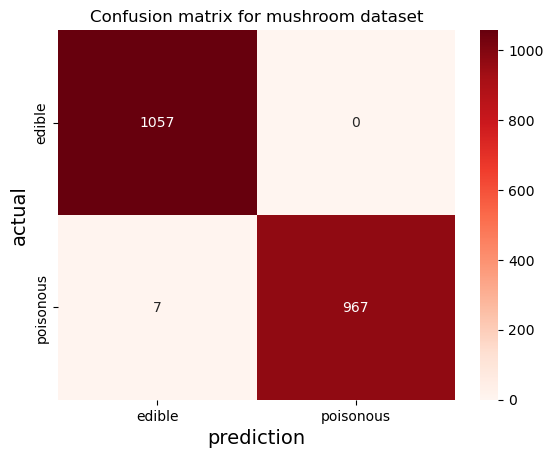

In [31]:
label = ['edible','poisonous']
ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)
ax.set_title('Confusion matrix for mushroom dataset')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)